In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df_heart = pd.read_excel('data_Cardiovascular.xlsx', sheet_name='heart')
df_heart.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [3]:
df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df_heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

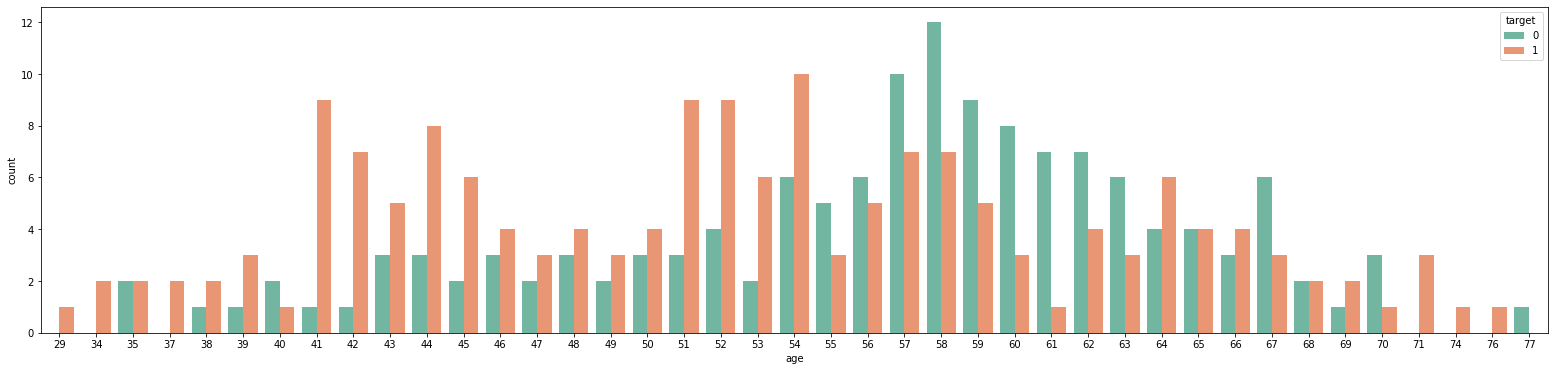

In [7]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 27, 6
sns.countplot(x='age', hue='target', data = df_heart, palette="Set2");

<AxesSubplot: xlabel='variable', ylabel='count'>

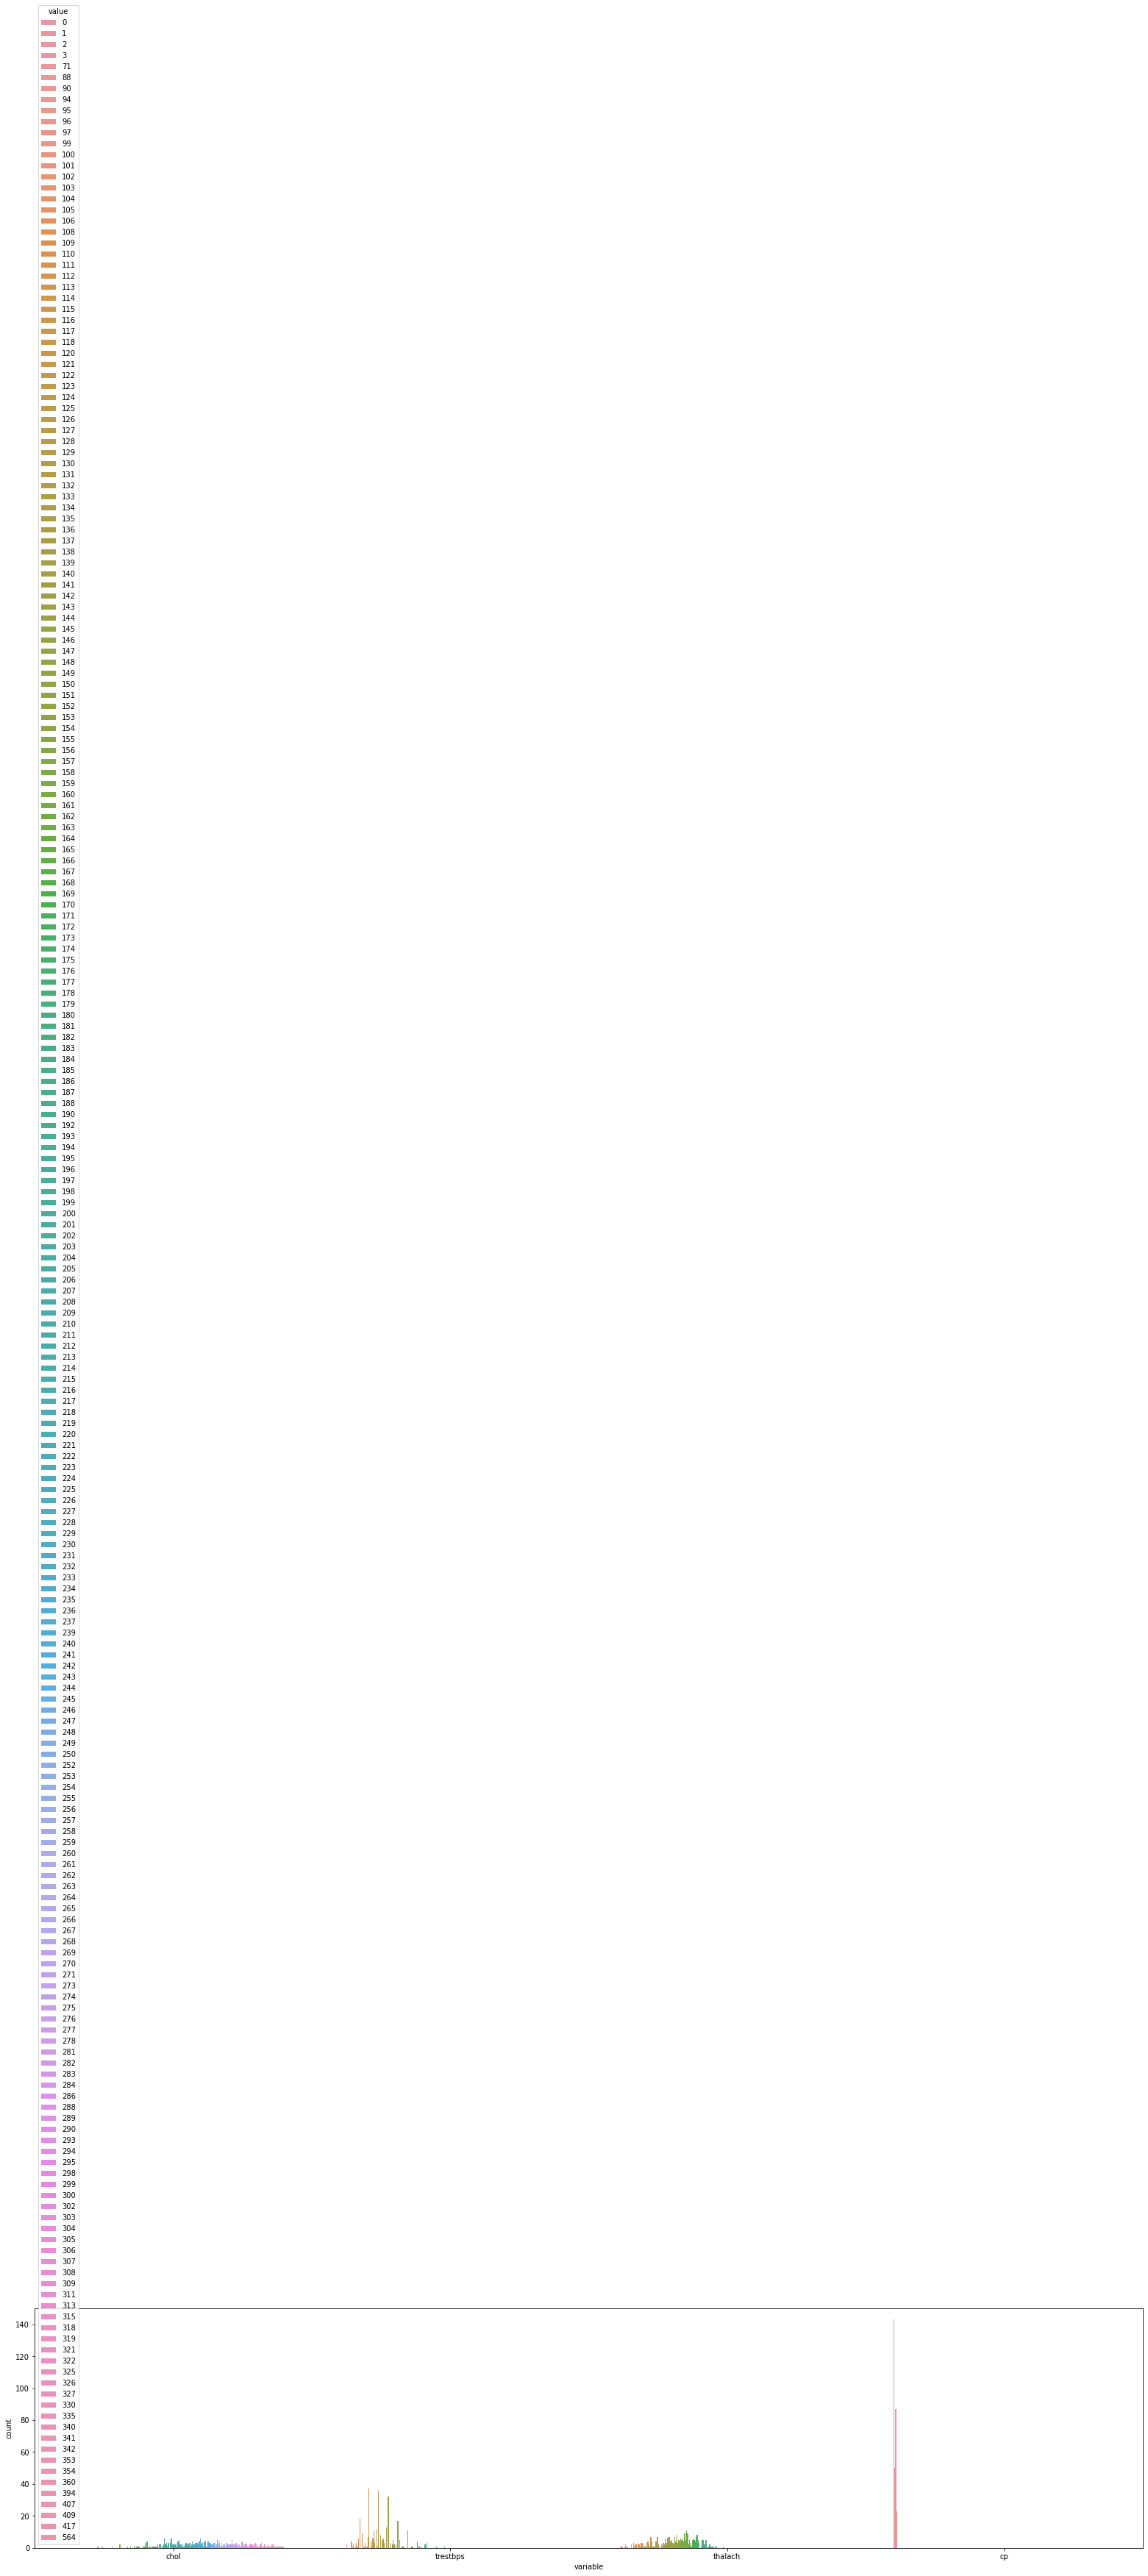

In [9]:
df_heart_category = df_heart.loc[:,['chol','trestbps', 'thalach', 'cp']]
sns.countplot(x="variable", hue="value",data= pd.melt(df_heart_category))


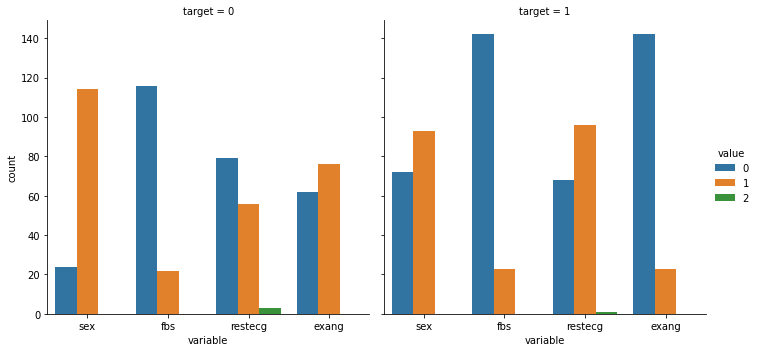

In [14]:
df_heart_cvd = pd.melt(df_heart, id_vars=['target'], value_vars=['sex','fbs','restecg','exang'])
sns.catplot(x="variable", hue="value", col="target",
                data=df_heart_cvd, kind="count");

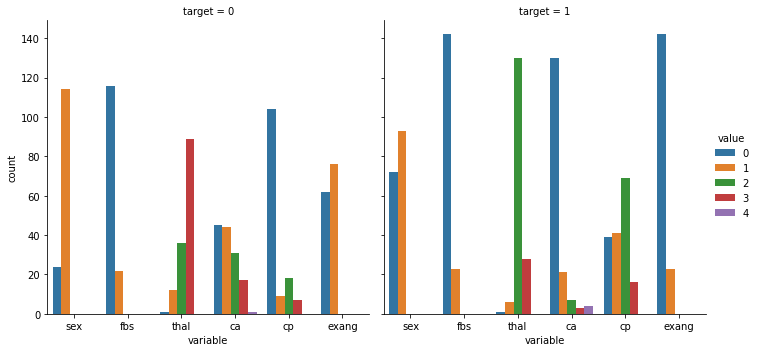

In [16]:
df_heart_cvd = pd.melt(df_heart, id_vars=['target'], value_vars=['sex','fbs','thal','ca', 'cp', 'exang'])
sns.catplot(x="variable", hue="value", col="target",
                data=df_heart_cvd, kind="count");

In [17]:
pd.crosstab(df_heart['target'],df_heart['sex'],normalize=True)

sex,0,1
target,,
0,0.079208,0.376238
1,0.237624,0.306931


<AxesSubplot: xlabel='variable', ylabel='value'>

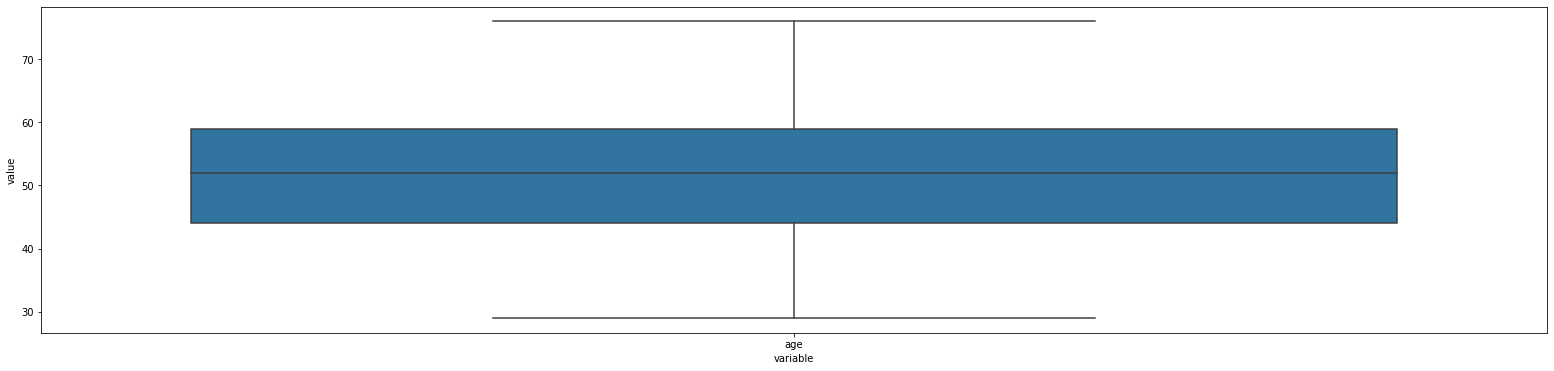

In [22]:
df_heart_age = df_heart[df_heart["target"] == 1]
df_heart_age = df_heart_age.loc[:,['age']]
sns.boxplot(x = 'variable',y = 'value',data = df_heart_age.melt())

<AxesSubplot: >

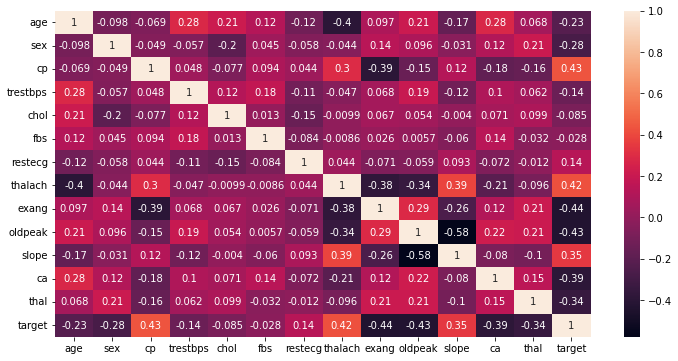

In [23]:
plt.figure(figsize=(12,6)) 
sns.heatmap(df_heart.corr(), annot=True)

<AxesSubplot: xlabel='variable', ylabel='value'>

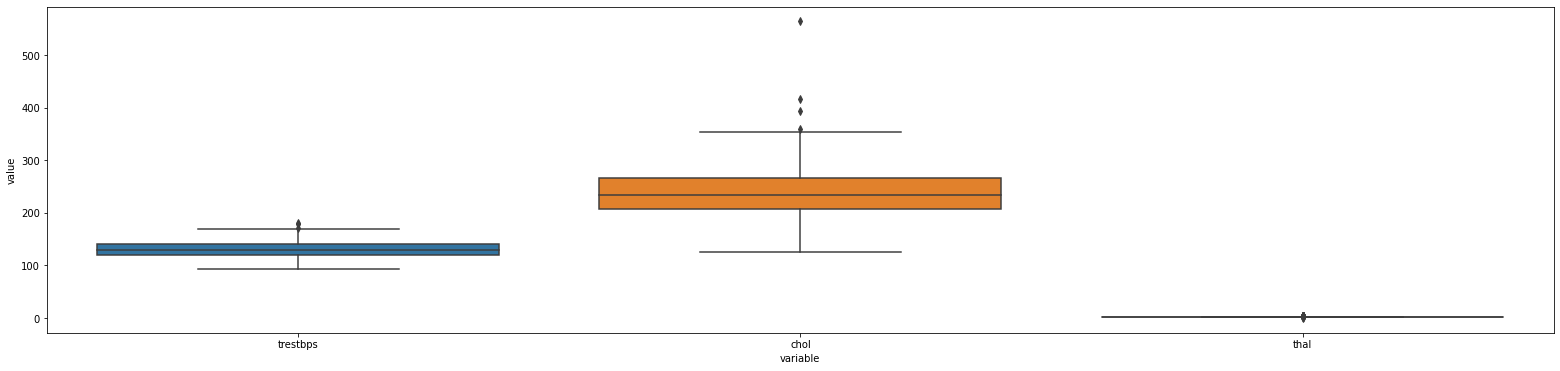

In [25]:
df_heart_trestbps = df_heart[df_heart["target"] == 1]
df_heart_trestbps = df_heart_trestbps.loc[:,['trestbps', 'chol', 'thal']]
sns.boxplot(x = 'variable',y = 'value',data = df_heart_trestbps.melt())

In [29]:
x = df_heart.drop(['target' ], axis=1)
y = df_heart['target']
from sklearn import model_selection
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.2, random_state=0) #80/20 split

In [30]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(x_train, y_train)

/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
prediction=model.predict(x_test)
prediction

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, prediction)

0.8524590163934426

<AxesSubplot: >

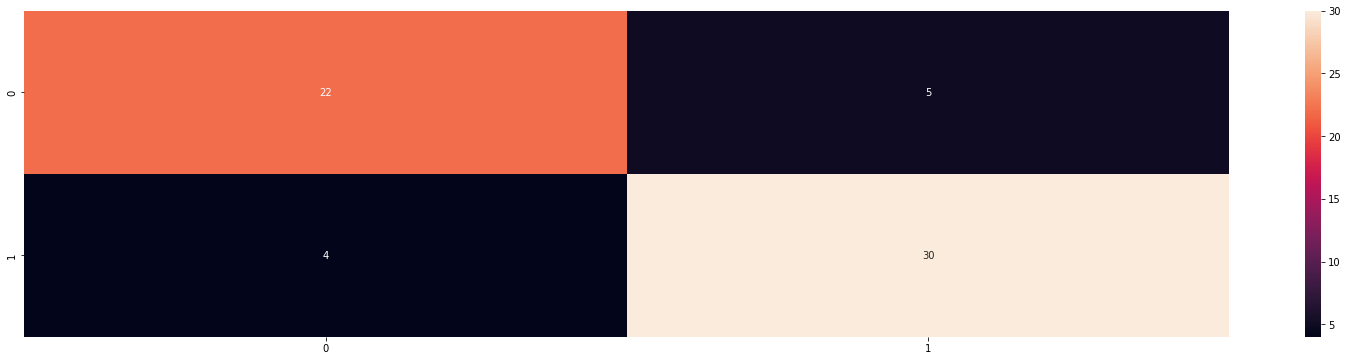

In [32]:
from sklearn.metrics import confusion_matrix

matrix= confusion_matrix(y_test, prediction)

sns.heatmap(matrix,annot = True, fmt = "d")